# Practical Statistics for Data Scientists — Exploratory Data Analysis

In [1]:
from scipy.stats import trim_mean
from statsmodels import robust

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/datasets/afi1289/practical-statistics/loan200.csv
/kaggle/input/datasets/afi1289/practical-statistics/four_sessions.csv
/kaggle/input/datasets/afi1289/practical-statistics/loan3000.csv
/kaggle/input/datasets/afi1289/practical-statistics/state.csv
/kaggle/input/datasets/afi1289/practical-statistics/imanishi_data.csv
/kaggle/input/datasets/afi1289/practical-statistics/loans_income.csv
/kaggle/input/datasets/afi1289/practical-statistics/lc_loans.csv
/kaggle/input/datasets/afi1289/practical-statistics/airline_stats.csv
/kaggle/input/datasets/afi1289/practical-statistics/sp500_sectors.csv
/kaggle/input/datasets/afi1289/practical-statistics/loan_data.csv
/kaggle/input/datasets/afi1289/practical-statistics/LungDisease.csv
/kaggle/input/datasets/afi1289/practical-statistics/click_rates.csv
/kaggle/input/datasets/afi1289/practical-statistics/kc_tax.csv
/kaggle/input/datasets/afi1289/practical-statistics/full_train_set.csv
/kaggle/input/datasets/afi1289/practical-statistics/sp500_d

## Estimates of Location

- Mean: average value in a distribution
- Trimmed mean: drop smallest and biggest values and average the remaining ones (remove the influence of extreme values)
- Median: the middle number in a sorted list. It depends only on the numbers in the center of the data, so it's not influenced by outliers
- Outliers: they are extreme cases, that are very distant from the other values in the dataset
  - It can influence the mean but not the median
  - It can a result of errors in the data (invalid or erroneous data

In [2]:
state = pd.read_csv('/kaggle/input/datasets/afi1289/practical-statistics/state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [3]:
state['Population'].describe()

count    5.000000e+01
mean     6.162876e+06
std      6.848235e+06
min      5.636260e+05
25%      1.833004e+06
50%      4.436370e+06
75%      6.680312e+06
max      3.725396e+07
Name: Population, dtype: float64

In [4]:
state['Population'].mean()

np.float64(6162876.3)

In [5]:
state['Population'].median()

4436369.5

In [6]:
trim_mean(state['Population'], 0.1)

np.float64(4783697.125)

In [7]:
np.average(state['Murder.Rate'], weights=state['Population'])

np.float64(4.445833981123393)

## Estimates of Variability

- Deviations: the difference between data and estimate of location (errors/residuals) - how disperse are the data compared to the central value
    - Averaging the deviation makes the negative deviations offset the positive ones
    - To get rid of negative deviations, square them
- Variance: Variance is the average of the squared differences from the mean
    - The average of squared deviations: it removes negative deviations and punishes outliers
- Standard Deviation: square root of variance
    - Because variance squared the deviations, the unit is now squared too
    - Use square root to get the score value back to the real unit
    - It's easier to interpret standard deviation (compared to variance) because it reads in the same unit
- How to interpret
    - High standard deviation: the data is spread, highly variable, possibly with outliers
    - Low standard deviation: the data is consistent and shrunken

In [8]:
state['Population'].std()

6848235.347401142

In [9]:
state['Population'].quantile(0.75)

np.float64(6680312.25)

In [10]:
state['Murder.Rate'].quantile([.5, .75, .9, .95, .99])

0.50    4.000
0.75    5.550
0.90    6.010
0.95    6.510
0.99    9.467
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

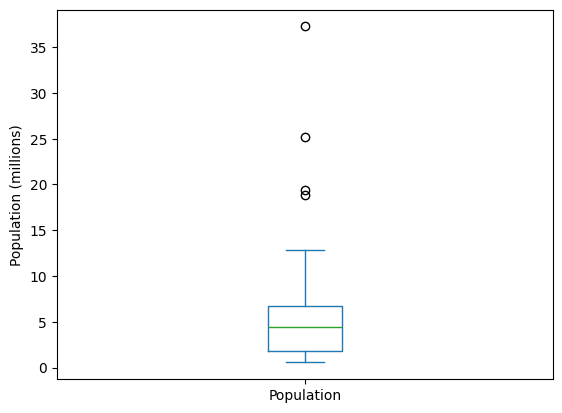

In [11]:
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')

In [12]:
binned_population = pd.cut(state['Population'], 10)
binned_population.value_counts()

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64

Text(0.5, 0, 'Population (millions)')

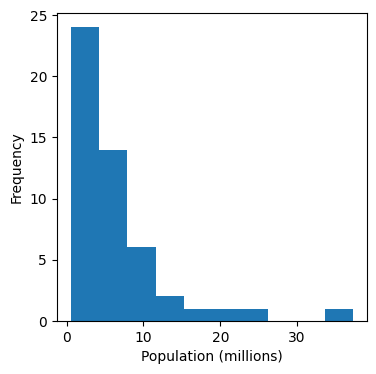

In [13]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')

Text(0.5, 0, 'Murder Rate (per 100,000)')

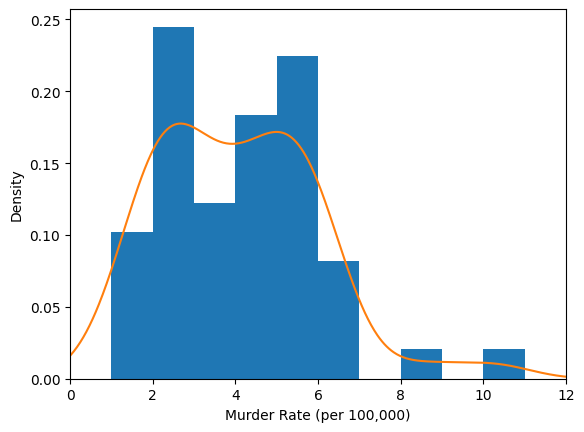

In [14]:
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

In [15]:
dfw = pd.read_csv("/kaggle/input/datasets/afi1289/practical-statistics/dfw_airline.csv")
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


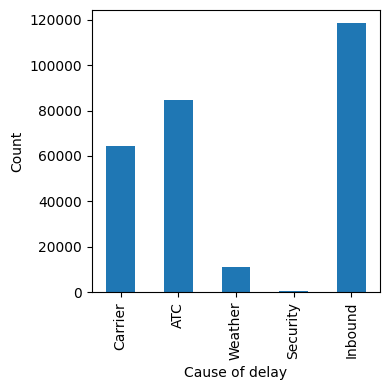

In [16]:
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Cause of delay')
ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

## Correlation

- Correlation between predictors
- Correlation between predictors and the target
- Positive correlation: high values of X go with high values of Y or low values of X with low values of Y
- Negative correlation: high values of X go with low values of Y or low values of X with high values of X
- The correlation coefficient ranges from –1 (perfect negative correlation) to +1 (perfect positive correlation).

In [17]:
sp500_sym = pd.read_csv("/kaggle/input/datasets/afi1289/practical-statistics/sp500_sectors.csv")
sp500_px = pd.read_csv("/kaggle/input/datasets/afi1289/practical-statistics/sp500_data.csv", index_col=0)

In [18]:
sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [19]:
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [20]:
sp500_sym['sector'].unique()

array(['information_technology', 'industrials', 'energy',
       'consumer_discretionary', 'utilities', 'materials', 'etf',
       'telecommunications_services', 'consumer_staples', 'financials',
       'health_care'], dtype=object)

<Axes: >

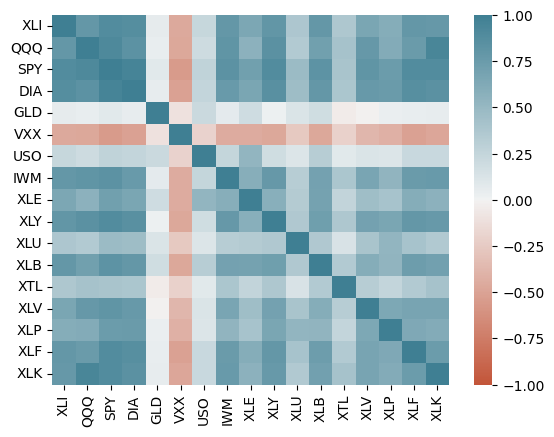

In [21]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01',
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]

sns.heatmap(etfs.corr(), vmin=-1, vmax=1,
            cmap=sns.diverging_palette(20, 220, as_cmap=True))

In [22]:
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01',
                       sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']]

telecom

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000
...,...,...,...,...,...
2015-06-25,0.049342,-1.600000,-0.040000,-0.187790,-0.330002
2015-06-26,-0.256586,0.039999,-0.070000,0.029650,-0.739998
2015-06-29,-0.098685,-0.559999,-0.060000,-0.504063,-1.360000
2015-06-30,-0.503298,-0.420000,-0.070000,-0.523829,0.199997


Line2D(_child2)


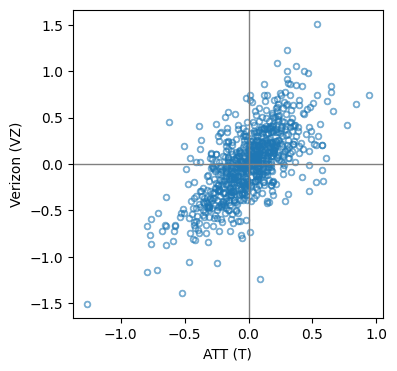

In [23]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
print(ax.axvline(0, color='grey', lw=1))

In [24]:
kc_tax = pd.read_csv("/kaggle/input/datasets/afi1289/practical-statistics/kc_tax.csv")
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]

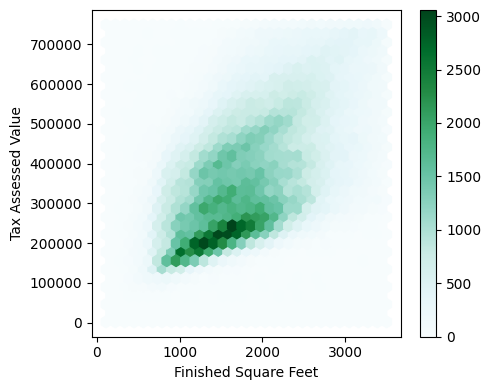

In [25]:
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

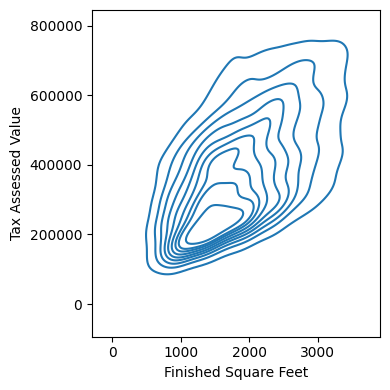

In [26]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')

plt.tight_layout()
plt.show()

Categorical and Categorical Features

In [27]:
lc_loans = pd.read_csv("/kaggle/input/datasets/afi1289/practical-statistics/lc_loans.csv")
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [29]:
crosstab = lc_loans.pivot_table(index='grade', columns='status', 
                                aggfunc=lambda x: len(x), margins=True)

crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [30]:
df = crosstab.copy().loc['A':'G',:].astype(float)
df.loc[:,'Charged Off':'Late'] = df.loc[:,'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


Categorical and Numerical Features

In [31]:
airline_stats = pd.read_csv("/kaggle/input/datasets/afi1289/practical-statistics/airline_stats.csv")
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


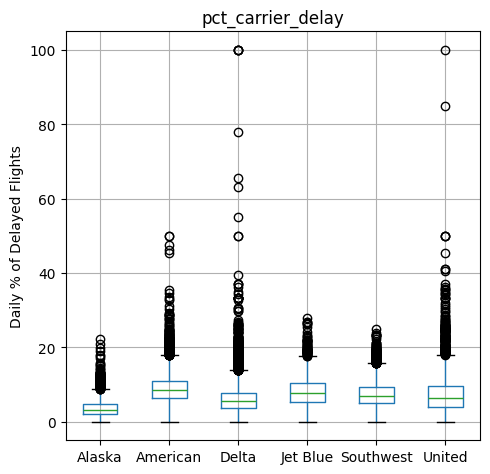

In [32]:
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')
plt.tight_layout()
plt.show()

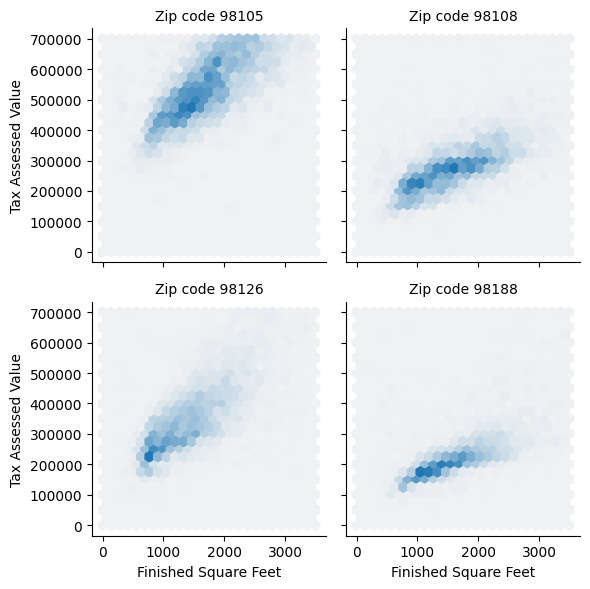

In [33]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes),:]

def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', 
      extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

plt.tight_layout()
plt.show()